## Problem Statement

Determine whether the tumor present in a patient is Malignant or Benign using the data provided.

## Importing the data

In [45]:
import numpy as np
import pandas as pd

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics
#data preprocessing for the models. Never preprocess before exploration if you can help it
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Selecting train and test data.
from sklearn.model_selection import train_test_split

#models that we will use to predict tumor type
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#ensembling techniques to enhance accuracy
from sklearn.ensemble import RandomForestClassifier

#metrics to check our model performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

#remove warnings every time we plot or apply a model to make notebook prettier
import warnings
warnings.filterwarnings('ignore')

#graphs are displayed in the cell. Magic functions op
%matplotlib inline

## Reading the data

In [2]:
cancer_data = pd.read_csv('../dataset/wisc_bc_data.csv')
cancer_data.head().T

,0,1,2,3,4
id,8670,8913,8915,9047,85715
diagnosis,M,B,B,B,M
radius_mean,15.46,12.89,14.96,12.94,13.17
texture_mean,19.48,13.12,19.1,16.17,18.66
perimeter_mean,101.7,81.89,97.03,83.18,85.98
area_mean,748.9,515.9,687.3,507.6,534.6
smoothness_mean,0.1092,0.06955,0.08992,0.09879,0.1158
compactness_mean,0.1223,0.03729,0.09823,0.08836,0.1231
concavity_mean,0.1466,0.0226,0.0594,0.03296,0.1226
points_mean,0.08087,0.01171,0.04819,0.0239,0.0734


diagnosis is our target column. M stands for Malignant(spreads and is harmful) and B stands for Benign(not harmful).
<br>
We also see that most of our columns have similar names, e.g Radius has a column for mean, se(standard error) and worst. This is repeated for all the columns except for id and dignosis. We will have to see what those represent.

In [3]:
cancer_data.shape

(569, 32)

In [4]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

We see that there are no null values in the dataset. All thecolums except for our target are int or float. We can encode our target later.

In [5]:
cancer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Now that we have the 5 number summary data, we can see that the standard error is pretty low and the general value for each property labeled worst is higher than their mean counterparts.

Find the count of the number of cases of Malignant and benine cancer cells we have.

In [6]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

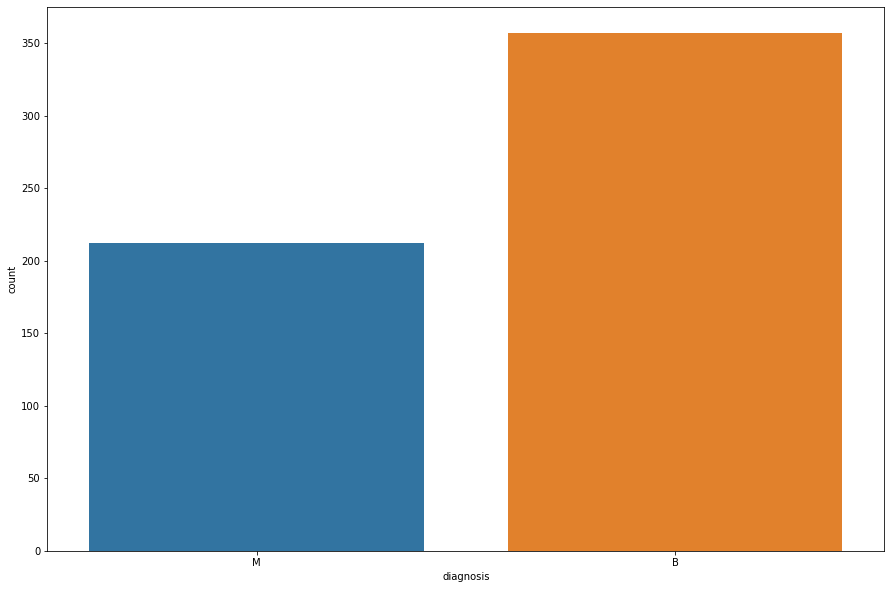

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(cancer_data['diagnosis'])

We see that more patients with benign cells (no cancer) and less people with cancerous cells.

## Preprocessing
<br>
since there isn't much to clean, we can encode our categorical data and then check for other relations.

In [8]:
label_encoder = LabelEncoder()

cancer_data['diagnosis'] = label_encoder.fit_transform(cancer_data['diagnosis'])
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,1,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,0,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,0,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


We have encoded our target. Instead of M and B, it now shows 1 for malignant and 0 for benign. Label encoder gors alphabetically and so B, coming before M gets value 0 even tho it appears later.
<br><br><br>
We will now pairplot between the diagnosis column and all the columns that are the mean of the cancer characters.

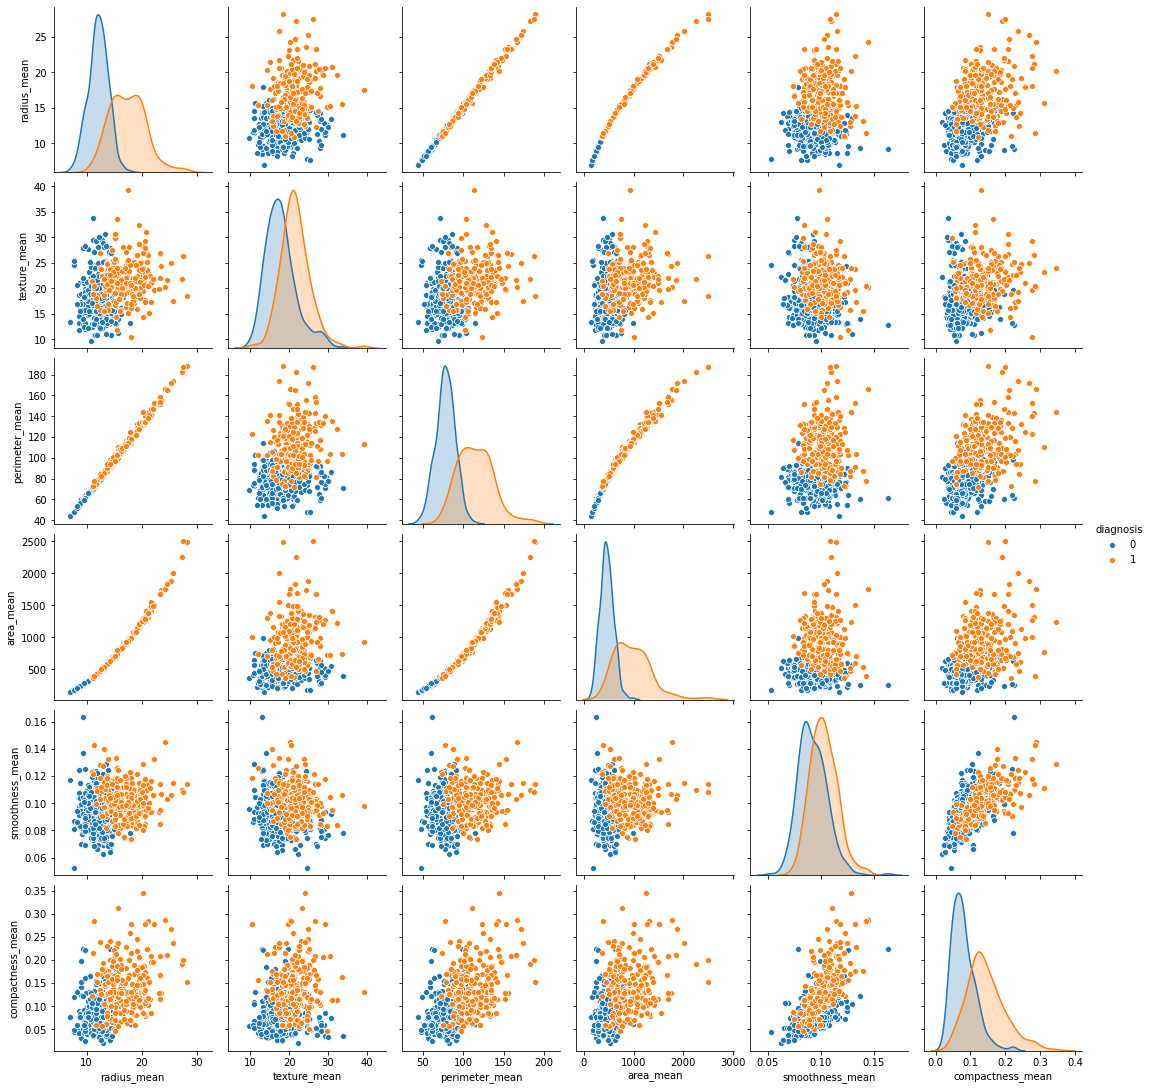

In [9]:
sns.pairplot(cancer_data.iloc[:,1:8], hue='diagnosis')

The pairplot gives us very interesting results.
<br><br>
The Malignant tumors usually have a smaller mean radius. This may be because they keep on dividing to grow in numbers and so do not get more time to grow larger. One of the reasons cancer is so dangerous is that the tumors are smaller and spread rapidly through, usually through the bloodstream. And since they are smaller, they aren't able to be detected quickly and so it is oftentimes, when they start to show symptoms, it is too late.
<br>
This analogy can be applied with the perimeter and the area as well. As the radius is smaller for malignant tumors, the area and perimeter are smaller. Same goes for belign tumors in the opposite direction. These three columns are corelated to each other.
<br>
Compactness is also a factor that is dependent on the size of the tumors. The histogram proves our analogy as the value is much lower for malignant tumors and higher for belign tumors.
<br><br>
Texture defines the nucleus structure. In malignant tumors it is enlarges which makes it break and create new tumors. In Belign it stays in place.
<br><br>
Smoothness shows how smooth or rough the cancer cells are. Since the graphs are highly overlapping, we must conclude both tumors have similar smoothness.

### Getting column corelations
<br>
We choose columns up to 11 because the 12th col is the column for standard error and we are not dealing with them right now.

##### We will create a new dataframe to deal with the Mean- properties of the data.

In [10]:
cancer_mean = pd.DataFrame()
cancer_mean = cancer_data.iloc[:, 1:12]
cancer_mean['diagnosis'] = cancer_data['diagnosis']
cancer_mean.head().T

,0,1,2,3,4
diagnosis,1.00000,0.00000,0.00000,0.00000,1.00000
radius_mean,15.46000,12.89000,14.96000,12.94000,13.17000
texture_mean,19.48000,13.12000,19.10000,16.17000,18.66000
perimeter_mean,101.70000,81.89000,97.03000,83.18000,85.98000
area_mean,748.90000,515.90000,687.30000,507.60000,534.60000
smoothness_mean,0.10920,0.06955,0.08992,0.09879,0.11580
compactness_mean,0.12230,0.03729,0.09823,0.08836,0.12310
concavity_mean,0.14660,0.02260,0.05940,0.03296,0.12260
points_mean,0.08087,0.01171,0.04819,0.02390,0.07340
symmetry_mean,0.19310,0.13370,0.18790,0.17350,0.21280


In [11]:
cancer_mean.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


We see that radium_mean, perimeter_mean, the area mean and the points_mean have high positive correlation with the disgnosis column

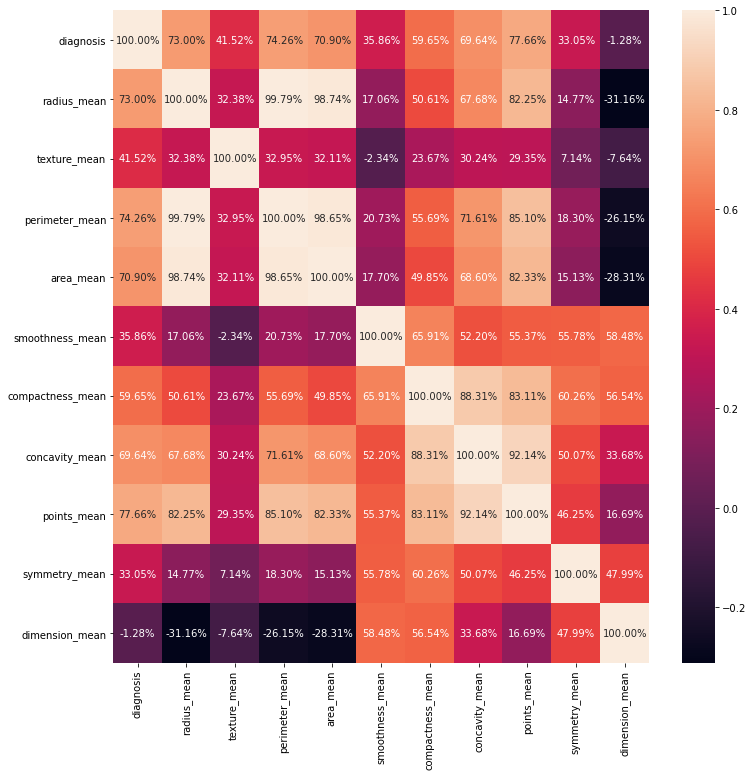

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(cancer_mean.corr(), annot=True, fmt='.2%')

The heatmap confirms our observation of the high corelations between radius, points, perimeter and area.
<br><br><br>
##### We will now check for correlations between the SE columns

In [13]:
cancer_se = pd.DataFrame()
cancer_se = cancer_data.iloc[:, 13:22]
cancer_se['diagnosis'] = cancer_data['diagnosis']
cancer_se.head().T

,0,1,2,3,4
texture_se,0.785900,0.469000,0.948000,0.905000,0.893700
perimeter_se,3.094000,1.115000,2.171000,0.997500,1.897000
area_se,48.310000,12.680000,24.870000,11.360000,24.250000
smoothness_se,0.006240,0.004731,0.005332,0.002887,0.006532
compactness_se,0.014840,0.013450,0.021150,0.012850,0.023360
concavity_se,0.028130,0.016520,0.015360,0.016130,0.029050
points_se,0.010930,0.005905,0.011870,0.007308,0.012150
symmetry_se,0.013970,0.016190,0.015220,0.018700,0.017430
dimension_se,0.002461,0.002081,0.002815,0.001972,0.003643
diagnosis,1.000000,0.000000,0.000000,0.000000,1.000000


In [14]:
cancer_se.corr()

,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,diagnosis
texture_se,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
points_se,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
dimension_se,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972
diagnosis,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,1.000000


We see that the corelation between standard erros with diagnosis is pretty low. These don't contribute to the data for model building but they do show the error in calculating the features.

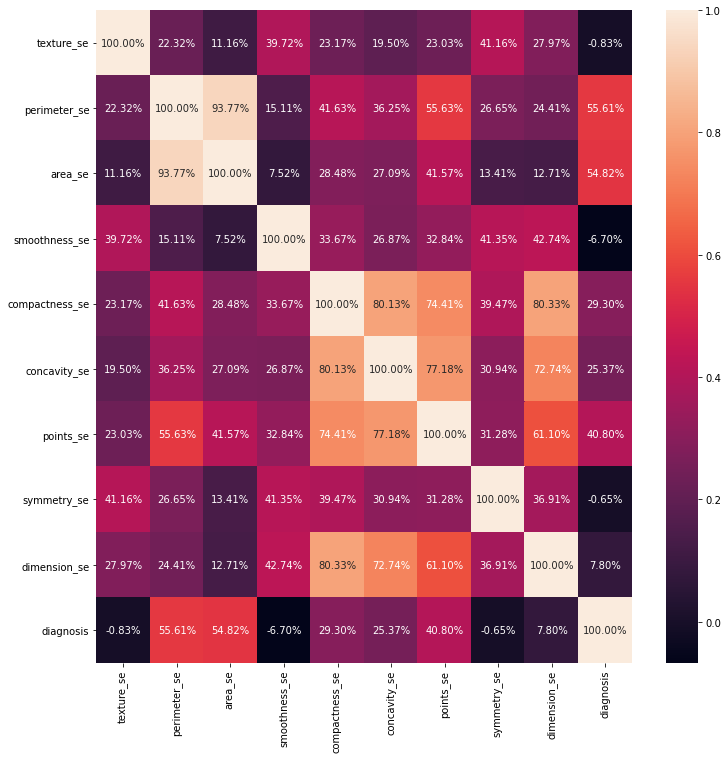

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(cancer_se.corr(), annot=True, fmt='.2%')

There is no real correlation of these properties with the diagnosis column so we will not consider these.
<br><br><br>
##### We will now make a dataframe to check the worst properties of the data.

In [16]:
cancer_worst = pd.DataFrame()
cancer_worst = cancer_data.iloc[:, 22:32]
cancer_worst['diagnosis'] = cancer_data['diagnosis']
cancer_worst.head().T

,0,1,2,3,4
radius_worst,19.26000,13.62000,16.25000,13.86000,15.6700
texture_worst,26.00000,15.54000,26.19000,23.02000,27.9500
perimeter_worst,124.90000,87.40000,109.10000,89.69000,102.8000
area_worst,1156.00000,577.00000,809.80000,580.90000,759.4000
smoothness_worst,0.15460,0.09616,0.13130,0.11720,0.1786
compactness_worst,0.23940,0.11470,0.30300,0.19580,0.4166
concavity_worst,0.37910,0.11860,0.18040,0.18100,0.5006
points_worst,0.15140,0.05366,0.14890,0.08388,0.2088
symmetry_worst,0.28370,0.23090,0.29620,0.32970,0.3900
dimension_worst,0.08019,0.06915,0.08472,0.07834,0.1179


In [17]:
cancer_worst.corr()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


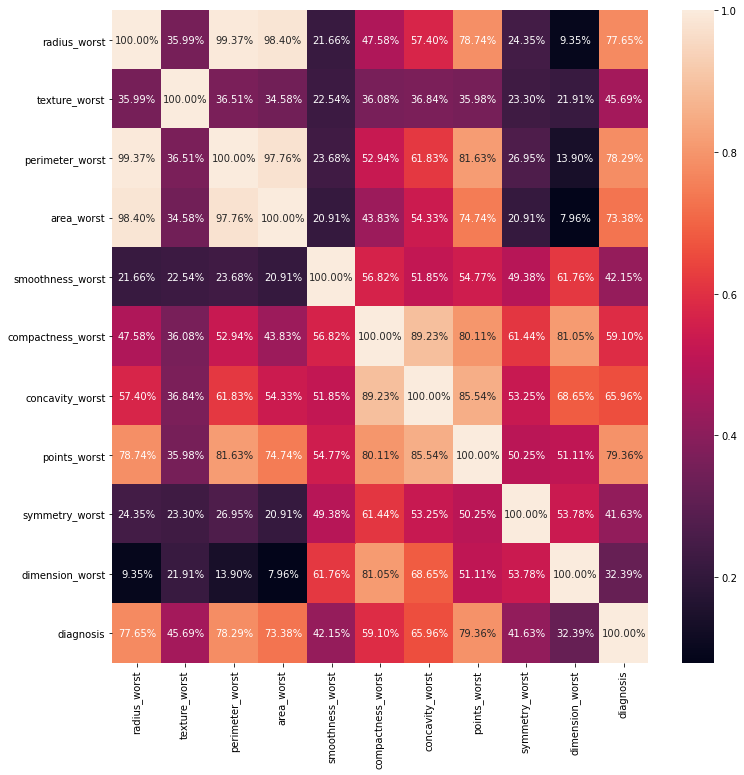

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(cancer_worst.corr(), annot=True, fmt='.2%')

We see that, here as well, the columns with property radius, perimeter, area and points were the ones with high correlation.

We Should now check the corelation between all the radius, perimeter, area and points properties to see if they are correlated with each other as well.
<br><br>
##### Creating dataframe for only the mean and worst properties.

In [19]:
column_names =  list(cancer_mean.columns) + list(cancer_worst.columns)
column_names

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 'symmetry_mean',
 'dimension_mean',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'points_worst',
 'symmetry_worst',
 'dimension_worst',
 'diagnosis']

We see that diagnosis has been added twice, once at the top of the list and once at the end. We can remove the last one.

In [20]:
column_names = column_names[0:-1]
column_names

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 'symmetry_mean',
 'dimension_mean',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'points_worst',
 'symmetry_worst',
 'dimension_worst']

In [21]:
mean_and_worst = pd.DataFrame()

mean_and_worst[column_names] = cancer_data[column_names]
mean_and_worst.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,1,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,0,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,0,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


We will be using this dataframe to carry on with our work

## Feature Scaling

In [22]:
features = mean_and_worst.iloc[:,1:22]
target = mean_and_worst.iloc[:, 0]

In [23]:
minmax_scaler = MinMaxScaler()
features = minmax_scaler.fit_transform(features)

## Train Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) 
#random state so our data doesnt change
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(455, 20) (455,) (114, 20) (114,)


## Creating a function for the models

##### Getting names of all the models

In [35]:
all_model_names = []

In [36]:
def models(x_train, y_train):
    
    #Logistic Regression
    logistic_regressor = LogisticRegression(random_state = 42)
    logistic_regressor.fit(x_train, y_train)
    all_model_names.append('Logistic Regression')
    
    #Decision Tree Classifier
    dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
    dtree.fit(x_train, y_train)
    all_model_names.append('Decision Tree Classifier')
    
    #Support Vector Classifier
    svc = SVC(kernel='rbf')
    svc.fit(x_train, y_train)
    all_model_names.append('Support Vector Classifier')

    
    #Random Forest Classifier
    random_forest = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 42)
    random_forest.fit(x_train, y_train)
    all_model_names.append('Random Forest Classifier')
    
    #Model Accuracy on training data
    print('Logistic Regression Train Accuracy: {}\n'.format(logistic_regressor.score(x_train, y_train)))
    
    print('Decision Tree Classifier Train Accuracy: {}\n'.format(dtree.score(x_train, y_train)))    
    
    print('Support Vector Classifier Train Accuracy: {}\n'.format(svc.score(x_train, y_train)))  
    
    print('Random Forest Classifier Train Accuracy: {}\n'.format(random_forest.score(x_train, y_train)))   
    
    return logistic_regressor, dtree, svc, random_forest

### Getting all the models

In [37]:
all_models = models(x_train, y_train)

Logistic Regression Train Accuracy: 0.967032967032967

Decision Tree Classifier Train Accuracy: 1.0

Support Vector Classifier Train Accuracy: 0.9802197802197802

Random Forest Classifier Train Accuracy: 0.9956043956043956



### Testing model on test data

In [38]:
confusion_matrix_reports = []

for i,model in enumerate(all_models):
    conf_mat = confusion_matrix(y_test, model.predict(x_test))
    confusion_matrix_reports.append(conf_mat)

In [39]:
model_matrix = dict(zip(model_names,confusion_matrix_reports))

all_models_accuracy = []

for name, matrix in model_matrix.items():
    print('{}\n\n{}\n'.format(name, matrix))
    true_positive = matrix[0][0]
    false_positive = matrix[0][1]
    false_negative = matrix[1][0]
    true_negative = matrix[1][1]
    
    print('True Positive: {}\nTrue Negative: {}\nFalse Positive: {}\nFalse Negative: {}\n'.format(
    true_positive, true_negative, false_positive, false_negative))
    
    test_accuracy = (true_positive + true_negative) / (true_positive+true_negative+false_positive+false_negative)
    
    all_models_accuracy.append(test_accuracy)
    
    print('Test Accuracy: {}\n\n'.format(test_accuracy))
    

Logistic Regression

[[66  2]
 [ 3 43]]

True Positive: 66
True Negative: 43
False Positive: 2
False Negative: 3

Test Accuracy: 0.956140350877193


Decision Tree Classifier

[[60  8]
 [ 3 43]]

True Positive: 60
True Negative: 43
False Positive: 8
False Negative: 3

Test Accuracy: 0.9035087719298246


Support Vector Classifier

[[67  1]
 [ 1 45]]

True Positive: 67
True Negative: 45
False Positive: 1
False Negative: 1

Test Accuracy: 0.9824561403508771


Random Forest Classifier

[[64  4]
 [ 4 42]]

True Positive: 64
True Negative: 42
False Positive: 4
False Negative: 4

Test Accuracy: 0.9298245614035088




##### Comparing models using their test accuracies in a prettier way:-

In [89]:
model_comparision_dict = dict(zip(model_names,all_models_accuracy))
model_comparision_dict

{'Logistic Regression': 0.956140350877193,
 'Decision Tree Classifier': 0.9035087719298246,
 'Support Vector Classifier': 0.9824561403508771,
 'Random Forest Classifier': 0.9298245614035088}

## An easier and prettier way to get all that info:-

#### all_models :- All the models fit with the dataset

#### all_model_names:- Names of all the models in order

#### Metrics :- Any metric we want to use, accuracy_score, classification_report, confusion_matrix or import sklearn.metrics.*

### Fimctons to do our bidding

In [67]:
def apply_metric(all_models, metric):
    metric_list = []
    for i,model in enumerate(all_models):
        metric_item = metric(y_test, model.predict(x_test))
        metric_list.append(metric_item)
    return metric_list

In [84]:
def report_printer(all_model_names, list_of_metric):
    all_model_metrics = dict(zip(all_model_names,list_of_metric))
    
    for name, matrix in all_model_metrics.items():
        print('{}\n{}\n\n'.format(name, matrix))
        

###### Classification Report

In [85]:
classification_report_list = apply_metric(all_models, classification_report)
report_printer(all_model_names, classification_report_list)

Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        68
           1       0.96      0.93      0.95        46

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        68
           1       0.84      0.93      0.89        46

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



Support Vector Classifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        68
           1       0.98      0.98      0.98        46

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114

##### Confusion matrix

In [87]:
confusion_matrix_list = apply_metric(all_models, confusion_matrix)
report_printer(all_model_names, confusion_matrix_list)

Logistic Regression
[[66  2]
 [ 3 43]]


Decision Tree Classifier
[[60  8]
 [ 3 43]]


Support Vector Classifier
[[67  1]
 [ 1 45]]


Random Forest Classifier
[[64  4]
 [ 4 42]]




##### Accuracy Score

In [88]:
accuracy_score_list = apply_metric(all_models, accuracy_score)
report_printer(all_model_names, accuracy_score_list)

Logistic Regression
0.956140350877193


Decision Tree Classifier
0.9035087719298246


Support Vector Classifier
0.9824561403508771


Random Forest Classifier
0.9298245614035088




### Model Evaluation
<br><br>
We see that the Support vector classifier performs the best cmopared to the other models. And since it has an accuracy of 98 and not well over 99, we can't not say that the model is overfit. The precission and the recall of the model are pretty high as well.
<br>
We saw that the model made one false-positive error and one false negative error. 
<br> 
We can use this model for further prediction of the disease.